## RFCx Theano

#### Setup

In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

#### Evaluation

In [8]:
y_true = np.load('D:/rfcx/YAMNet-transfer-learning/y_true.npy')
y_pred = np.load('D:/rfcx/YAMNet-transfer-learning/y_pred.npy')
y_pred_scores = np.load('D:/rfcx/YAMNet-transfer-learning/y_pred_scores.npy')

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_scores)
auc_value = metrics.auc(fpr, tpr)
print(f"AUC: {auc_value}")

AUC: 0.702516674931301


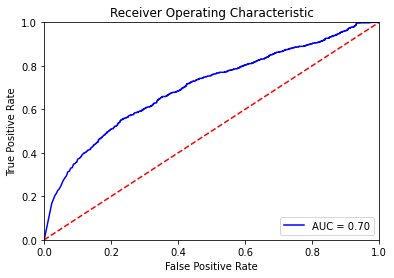

In [9]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_value)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('rfcx-theano.png')
plt.show()

#### Precision and recall curve

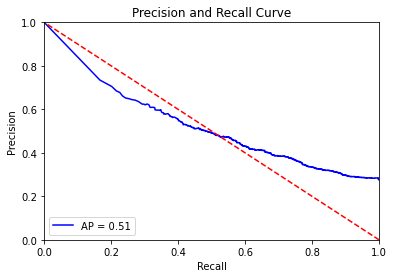

In [12]:
avg_precision_score = metrics.average_precision_score(y_true, y_pred_scores)

precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_pred_scores)

plt.title('Precision and Recall Curve')
plt.plot(recall, precision, 'b', label = 'AP = %0.2f' % avg_precision_score)
plt.legend(loc = 'lower left')
plt.plot([1, 0], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('yamnet-prec.png')
plt.show()

#### Calcurate confusion metrix

In [4]:
cfmx = metrics.confusion_matrix(y_true, y_pred)
print("Confusion matrix:")
print(cfmx)

tn, fp, fn, tp = cfmx.ravel()
print(f"true positive: {tp}, true negative: {tn}, false positive: {fp}, false negative: {fn}")

Confusion matrix:
[[ 797 1877]
 [ 136  861]]
true positive: 861, true negative: 797, false positive: 1877, false negative: 136


In [5]:
report = metrics.classification_report(y_true, y_pred)
print(report)

precision    recall  f1-score   support

           0       0.85      0.30      0.44      2674
           1       0.31      0.86      0.46       997

    accuracy                           0.45      3671
   macro avg       0.58      0.58      0.45      3671
weighted avg       0.71      0.45      0.45      3671

